In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from community import community_louvain

In [2]:
dt=pd.read_csv("/content/1. 10_node_ngau_nhien.csv", encoding="ISO-8859-1")
dt.dropna()
dt.drop_duplicates()
dt

,Airline,DestinationCountry
0,Air France,Madagascar
1,Swissair,Madagascar
2,Air France,Kenya
3,Air France,Kenya
4,Air France,Kenya
...,...,...
72,Swissair,Mozambique
73,Swissair,Mozambique
74,Swissair,Mozambique
75,Swissair,Mozambique


In [3]:
B = nx.Graph()
Airline = dt['Airline']
DestinationCountry = dt['DestinationCountry']

for index, row in dt.iterrows():
    B.add_edge(row['Airline'], row['DestinationCountry'], weight=1)
B.add_nodes_from(DestinationCountry,bipartite=0)
B.add_nodes_from(Airline,bipartite=1)

print('Số chuyến bay', Airline.nunique())
print('Số điểm đến', DestinationCountry.nunique())
print('Số cạnh', len(dt))

Số chuyến bay 10
Số điểm đến 10
Số cạnh 77


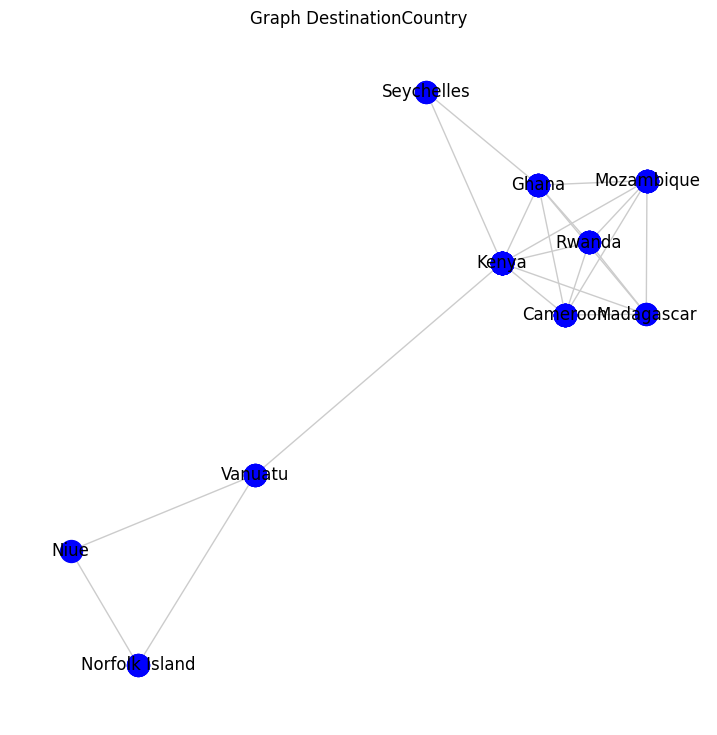

In [4]:
G = bipartite.weighted_projected_graph(B,list(set(DestinationCountry)))
plt.figure(figsize=(9,9))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=DestinationCountry,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(DestinationCountry, DestinationCountry))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph DestinationCountry")

plt.show()

In [5]:
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

# **Degree Centrality**

In [6]:
deg_cen = nx.degree_centrality(G) # return a dictionary
deg_cen_df = print_table(deg_cen.items(), ['Destination Country', 'Degree centrality'])

print("Degree Centrality of each country \n")
deg_cen_df

Degree Centrality of each country 



,Destination Country,Degree centrality
0,Madagascar,0.555556
1,Mozambique,0.555556
2,Niue,0.222222
3,Norfolk Island,0.222222
4,Cameroon,0.555556
5,Ghana,0.666667
6,Kenya,0.777778
7,Rwanda,0.555556
8,Vanuatu,0.333333
9,Seychelles,0.222222


# **Closeness**

In [7]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality_df = print_table(closeness_centrality.items(), ['Node', 'Closeness centrality'])
closeness_centrality_df

,Node,Closeness centrality
0,Madagascar,0.600000
1,Mozambique,0.600000
2,Niue,0.409091
3,Norfolk Island,0.409091
4,Cameroon,0.600000
5,Ghana,0.642857
6,Kenya,0.818182
7,Rwanda,0.600000
8,Vanuatu,0.600000
9,Seychelles,0.500000


# **Harmonic**

In [8]:
harmonic_cen = nx.harmonic_centrality(G)
sorted_closeness_centrality = sorted(harmonic_cen.items(), key=lambda x:x[1], reverse=True)
harmonic_cen_df = print_table(harmonic_cen.items(), ['Node', 'Harmonic centrality'])
harmonic_cen_df

,Node,Harmonic centrality
0,Madagascar,6.666667
1,Mozambique,6.666667
2,Niue,4.500000
3,Norfolk Island,4.500000
4,Cameroon,6.666667
5,Ghana,7.166667
6,Kenya,8.000000
7,Rwanda,6.666667
8,Vanuatu,6.000000
9,Seychelles,5.166667


# **Betweenness**

In [9]:
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)
bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])
bet_cen_df

,Node,Betweenness centrality
0,Madagascar,0.0
1,Mozambique,0.0
2,Niue,0.0
3,Norfolk Island,0.0
4,Cameroon,0.0
5,Ghana,2.0
6,Kenya,20.0
7,Rwanda,0.0
8,Vanuatu,14.0
9,Seychelles,0.0


# **Eigenvector**

In [ ]:
eig_cen = nx.eigenvector_centrality(G, max_iter=100)
eig_cen_df = print_table(eig_cen.items(), ['Destination Country', 'Eigenvector Centrality'])
eig_cen_df

,Destination Country,Eigenvector Centrality
0,Norfolk Island,0.021968
1,Seychelles,0.163530
2,Ghana,0.415649
3,Cameroon,0.389163
4,Vanuatu,0.091693
5,Niue,0.021968
6,Kenya,0.430500
7,Mozambique,0.389163
8,Rwanda,0.389163
9,Madagascar,0.389163


# **PageRank**

In [ ]:
pagerank = nx.pagerank(G, tol=1e-6, alpha=0.85)
pagerank_df = print_table(pagerank.items(), ['Destination Country', 'Pagerank'])
pagerank_df

,Destination Country,Pagerank
0,Norfolk Island,0.064546
1,Seychelles,0.039266
2,Ghana,0.130208
3,Cameroon,0.127440
4,Vanuatu,0.078045
5,Niue,0.064546
6,Kenya,0.202103
7,Mozambique,0.070711
8,Rwanda,0.144459
9,Madagascar,0.078676
